# Actividad 1

Equipo 3

- Arturo Hernández Pereztagle			A00838056
- José Eduardo López Arzamendi			A00836314
- Jose Miguel Ruiz de la Garza			A01722268
- Juan Marco Castro Trinidad			A01742821

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Cargar Datos y Definir Variables

In [28]:
# Convierte el excel a csv
import pandas as pd

def excel_a_csv(ruta_excel, ruta_csv):
    # Lee el archivo Excel
    df = pd.read_excel(ruta_excel)
    
    # Guarda el DataFrame como un archivo CSV
    df.to_csv(ruta_csv, index=False)

if __name__ == "__main__":
    ruta_excel = "act2_empresas.xlsx"
    ruta_csv = "datos_historicos_act2.csv"
    excel_a_csv(ruta_excel, ruta_csv)
    print(f"Archivo convertido de {ruta_excel} a {ruta_csv}")

Archivo convertido de act2_empresas.xlsx a datos_historicos_act2.csv


In [29]:
# Cargar datos históricos
df = pd.read_csv('datos_historicos_act2.csv')

# Mostrar primeras filas
print("Datos cargados:")
print(df.head())
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")

Datos cargados:
         Date  Día    SIEGn.DE  AAPL.O     LMT  MSFT.O  NVDA.O  GOOGL.O  \
0  2025-11-04    1  280.390440  270.04  484.98  514.33  198.69   277.54   
1  2025-11-03    2  284.724960  269.05  487.94  517.03  206.88   283.72   
2  2025-10-31    3  283.217370  270.37  491.88  517.81  202.49   281.19   
3  2025-10-30    4  285.655500  271.40  489.72  525.76  202.89   281.48   
4  2025-10-29    5  285.045425  269.70  485.33  541.55  207.04   274.57   

   INTC.O       XAU=  
0   37.03  3931.7800  
1   39.50  4001.4200  
2   39.99  4001.7798  
3   40.16  4023.2200  
4   41.34  3929.3633  

Dimensiones: (1000, 10)

Columnas: ['Date', 'Día', 'SIEGn.DE', 'AAPL.O', 'LMT', 'MSFT.O', 'NVDA.O', 'GOOGL.O', 'INTC.O', 'XAU=']


In [30]:
# Definir el número de acciones de cada empresa
acciones = {
    'SIEGn.DE': 369,
    'AAPL.O': 528,
    'LMT': 217,
    'MSFT.O': 200,
    'NVDA.O': 1892,    
    'GOOGL.O': 381,
    'INTC.O': 1436,
    'XAU=': 9
}

print("Número de acciones por empresa:")
for empresa, num_acciones in acciones.items():
    print(f"{empresa}: {num_acciones}")

Número de acciones por empresa:
SIEGn.DE: 369
AAPL.O: 528
LMT: 217
MSFT.O: 200
NVDA.O: 1892
GOOGL.O: 381
INTC.O: 1436
XAU=: 9


## 2. Calcular V0 (Valor del Portafolio)

In [31]:
# Calcular V0 (valor del portafolio) para cada día
# V0 = suma de (precio * número de acciones) para todas las empresas

df['V0'] = 0
for empresa, num_acciones in acciones.items():
    if empresa in df.columns:
        df['V0'] += df[empresa] * num_acciones
    else:
        print(f"Advertencia: {empresa} no encontrada en el DataFrame")

print("V0 calculado para cada día:")
print(df[['Date', 'Día', 'V0']].head(10))
print(f"\nV0 actual (día más reciente): ${df['V0'].iloc[0]:,.2f}")

V0 calculado para cada día:
         Date  Día            V0
0  2025-11-04    1  1.024377e+06
1  2025-11-03    2  1.048660e+06
2  2025-10-31    3  1.041249e+06
3  2025-10-30    4  1.045118e+06
4  2025-10-29    5  1.052269e+06
5  2025-10-28    6  1.039173e+06
6  2025-10-27    7  1.017422e+06
7  2025-10-24    8  9.967274e+05
8  2025-10-23    9  9.828002e+05
9  2025-10-22   10  9.767987e+05

V0 actual (día más reciente): $1,024,377.17


## 3. Calcular P&L (Profit and Loss)

In [32]:
# Calcular P&L: diferencia entre el V0 del día actual y el V0 del día anterior
# P&L = V0_actual - V0_anterior
# Como los datos están ordenados del más reciente al más antiguo, usamos shift(-1)

df['P&L'] = df['V0'] - df['V0'].shift(-1)

# El último día no tiene P&L porque no hay día siguiente
print("P&L calculado:")
print(df[['Date', 'Día', 'V0', 'P&L']].head(10))
print(f"\nNúmero de P&L calculados: {df['P&L'].notna().sum()}")

P&L calculado:
         Date  Día            V0           P&L
0  2025-11-04    1  1.024377e+06 -24282.777880
1  2025-11-03    2  1.048660e+06   7411.292510
2  2025-10-31    3  1.041249e+06  -3869.161770
3  2025-10-30    4  1.045118e+06  -7151.512025
4  2025-10-29    5  1.052269e+06  13096.066175
5  2025-10-28    6  1.039173e+06  21750.922890
6  2025-10-27    7  1.017422e+06  20694.964560
7  2025-10-24    8  9.967274e+05  13927.187855
8  2025-10-23    9  9.828002e+05   6001.532045
9  2025-10-22   10  9.767987e+05  -5257.398280

Número de P&L calculados: 999


## 4. Calcular Ranked P&L

In [33]:
# Ranked P&L: ordenar el P&L de menor a mayor
df['Ranked_P&L'] = df['P&L'].rank(method='min', na_option='keep')

print("Ranked P&L:")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].dropna().head(10))
print("\nP&L más bajo (peores pérdidas):")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].nsmallest(5, 'P&L'))

Ranked P&L:
         Date  Día           P&L  Ranked_P&L
0  2025-11-04    1 -24282.777880        10.0
1  2025-11-03    2   7411.292510       824.0
2  2025-10-31    3  -3869.161770       247.0
3  2025-10-30    4  -7151.512025       143.0
4  2025-10-29    5  13096.066175       941.0
5  2025-10-28    6  21750.922890       994.0
6  2025-10-27    7  20694.964560       992.0
7  2025-10-24    8  13927.187855       953.0
8  2025-10-23    9   6001.532045       771.0
9  2025-10-22   10  -5257.398280       187.0

P&L más bajo (peores pérdidas):
           Date  Día           P&L  Ranked_P&L
198  2025-01-22  199 -49479.954805         1.0
149  2025-04-02  150 -41376.912310         2.0
150  2025-04-01  151 -36075.052725         3.0
297  2024-08-28  298 -32841.116040         4.0
17   2025-10-10   18 -30151.859255         5.0


## 5. Calcular Rendimiento

In [34]:
# Calcular Rendimiento: (V0_actual / V0_anterior) - 1
df['Rendimiento'] = (df['V0'] / df['V0'].shift(-1)) - 1

print("Rendimiento calculado:")
print(df[['Date', 'Día', 'V0', 'Rendimiento']].head(10))

# Estadísticas del rendimiento
print("\n" + "="*50)
print("ESTADÍSTICAS DEL RENDIMIENTO")
print("="*50)
print(f"Rendimiento promedio: {df['Rendimiento'].mean():.6f}")
print(f"Desviación estándar: {df['Rendimiento'].std():.6f}")
print(f"Rendimiento mínimo: {df['Rendimiento'].min():.6f}")
print(f"Rendimiento máximo: {df['Rendimiento'].max():.6f}")

Rendimiento calculado:
         Date  Día            V0  Rendimiento
0  2025-11-04    1  1.024377e+06    -0.023156
1  2025-11-03    2  1.048660e+06     0.007118
2  2025-10-31    3  1.041249e+06    -0.003702
3  2025-10-30    4  1.045118e+06    -0.006796
4  2025-10-29    5  1.052269e+06     0.012602
5  2025-10-28    6  1.039173e+06     0.021378
6  2025-10-27    7  1.017422e+06     0.020763
7  2025-10-24    8  9.967274e+05     0.014171
8  2025-10-23    9  9.828002e+05     0.006144
9  2025-10-22   10  9.767987e+05    -0.005353

ESTADÍSTICAS DEL RENDIMIENTO
Rendimiento promedio: 0.000839
Desviación estándar: 0.014097
Rendimiento mínimo: -0.062164
Rendimiento máximo: 0.109550


In [35]:
# Guardar variables importantes para usar en cálculos posteriores
rendimiento_promedio = df['Rendimiento'].mean()
desviacion_estandar = df['Rendimiento'].std()
V0_hoy = df['V0'].iloc[0]  # Valor más reciente del portafolio

print(f"\nVariables guardadas:")
print(f"Rendimiento Promedio: {rendimiento_promedio:.6f}")
print(f"Desviación Estándar: {desviacion_estandar:.6f}")
print(f"V0 Actual: ${V0_hoy:,.2f}")


Variables guardadas:
Rendimiento Promedio: 0.000839
Desviación Estándar: 0.014097
V0 Actual: $1,024,377.17


## 6. Calcular VaR Paramétrico

In [36]:
# VaR Paramétrico
# Basado en la distribución normal de los rendimientos

# Valores z para diferentes niveles de confianza
z_99 = 2.326  # 99% de confianza (1% VaR)
z_95 = 1.645  # 95% de confianza (5% VaR)

# Fórmula: VaR = V0 * (z * desviación_estándar - rendimiento_promedio)
# Nota: Corregí la fórmula para que sea correcta según la teoría de VaR
VaR_parametrico_1pct = V0_hoy * (rendimiento_promedio - z_99 * desviacion_estandar)
VaR_parametrico_5pct = V0_hoy * (rendimiento_promedio - z_95 * desviacion_estandar)

print("="*60)
print("VaR PARAMÉTRICO (1 día)")
print("="*60)
print(f"\n1% VaR (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_5pct/V0_hoy)*100:.2f}%")

print(f"\nValor del portafolio actual: ${V0_hoy:,.2f}")

VaR PARAMÉTRICO (1 día)

1% VaR (99% confianza):
  Pérdida máxima esperada: $32,728.79
  Porcentaje del portafolio: -3.19%

5% VaR (95% confianza):
  Pérdida máxima esperada: $22,894.80
  Porcentaje del portafolio: -2.23%

Valor del portafolio actual: $1,024,377.17


## 7. Calcular VaR No Paramétrico (Histórico)

In [37]:
# ============================================================================
# VaR NO PARAMÉTRICO (HISTÓRICO)
# ============================================================================
# Método tradicional: usa los percentiles de las pérdidas históricas del portafolio
# Este método refleja el riesgo real del portafolio completo

# Limpiar datos NaN
PnL_clean = df['P&L'].dropna()

# Ordenar P&L de menor a mayor (pérdidas más grandes primero)
PnL_sorted = PnL_clean.sort_values()

# Calcular percentiles
num_observaciones = len(PnL_sorted)
indice_1pct = int(num_observaciones * 0.01)
indice_5pct = int(num_observaciones * 0.05)

# VaR no paramétrico: el percentil correspondiente del P&L
VaR_no_parametrico_1pct = PnL_sorted.iloc[indice_1pct]
VaR_no_parametrico_5pct = PnL_sorted.iloc[indice_5pct]

print("="*70)
print("VaR NO PARAMÉTRICO (HISTÓRICO)")
print("="*70)
print(f"\n📊 Método: Percentiles de P&L histórico")
print(f"   Número de observaciones: {num_observaciones}")
print(f"   Se ordenan todas las pérdidas/ganancias de menor a mayor")

print(f"\n1% VaR (99% confianza):")
print(f"  Posición en ranking: {indice_1pct + 1} de {num_observaciones}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_1pct:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Posición en ranking: {indice_5pct + 1} de {num_observaciones}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_5pct:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_5pct/V0_hoy)*100:.2f}%")

print("\n✅ Este método considera todas las pérdidas históricas del portafolio completo.")

VaR NO PARAMÉTRICO (HISTÓRICO)

📊 Método: Percentiles de P&L histórico
   Número de observaciones: 999
   Se ordenan todas las pérdidas/ganancias de menor a mayor

1% VaR (99% confianza):
  Posición en ranking: 10 de 999
  P&L en ese percentil: $-24,282.78
  Pérdida máxima esperada: $24,282.78
  Porcentaje del portafolio: -2.37%

5% VaR (95% confianza):
  Posición en ranking: 50 de 999
  P&L en ese percentil: $-12,433.00
  Pérdida máxima esperada: $12,433.00
  Porcentaje del portafolio: -1.21%

✅ Este método considera todas las pérdidas históricas del portafolio completo.


## 8. Comparación VaR Paramétrico vs No Paramétrico

In [38]:
# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Método': ['Paramétrico (Normal)', 'No Paramétrico (Histórico)'],
    '1% VaR': [abs(VaR_parametrico_1pct), abs(VaR_no_parametrico_1pct)],
    '5% VaR': [abs(VaR_parametrico_5pct), abs(VaR_no_parametrico_5pct)]
})

print("="*70)
print("COMPARACIÓN DE MÉTODOS VaR")
print("="*70)
print("\n" + comparacion.to_string(index=False))

# Diferencias entre métodos
print(f"\n{'='*70}")
print("ANÁLISIS DE DIFERENCIAS:")
print(f"{'='*70}")

diferencia_1pct = abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)
diferencia_5pct = abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)

print(f"\n1% VaR (99% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_1pct):,.2f} ({(diferencia_1pct/abs(VaR_parametrico_1pct))*100:+.2f}%)")

print(f"\n5% VaR (95% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_5pct):,.2f} ({(diferencia_5pct/abs(VaR_parametrico_5pct))*100:+.2f}%)")

print(f"\n\n💡 INTERPRETACIÓN:")
print("-" * 70)
print(f"   • Método Paramétrico: Asume distribución normal de los rendimientos")
print(f"   • Método No Paramétrico: Usa la distribución real histórica del P&L")
print(f"   • El método histórico NO asume normalidad y captura mejor eventos extremos")
if diferencia_1pct > 1000:
    print(f"   • ⚠️  El VaR histórico es MAYOR, indicando colas más pesadas que la normal")
    print(f"   • Los eventos extremos son más probables de lo que predice el modelo normal")
print(f"\n   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo")

COMPARACIÓN DE MÉTODOS VaR

                    Método       1% VaR       5% VaR
      Paramétrico (Normal) 32728.790395 22894.801744
No Paramétrico (Histórico) 24282.777880 12432.995970

ANÁLISIS DE DIFERENCIAS:

1% VaR (99% Confianza):
  Paramétrico:       $32,728.79
  No Paramétrico:    $24,282.78
  Diferencia:        $8,446.01 (-25.81%)

5% VaR (95% Confianza):
  Paramétrico:       $22,894.80
  No Paramétrico:    $12,433.00
  Diferencia:        $10,461.81 (-45.70%)


💡 INTERPRETACIÓN:
----------------------------------------------------------------------
   • Método Paramétrico: Asume distribución normal de los rendimientos
   • Método No Paramétrico: Usa la distribución real histórica del P&L
   • El método histórico NO asume normalidad y captura mejor eventos extremos

   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo


## 9. Visualizaciones

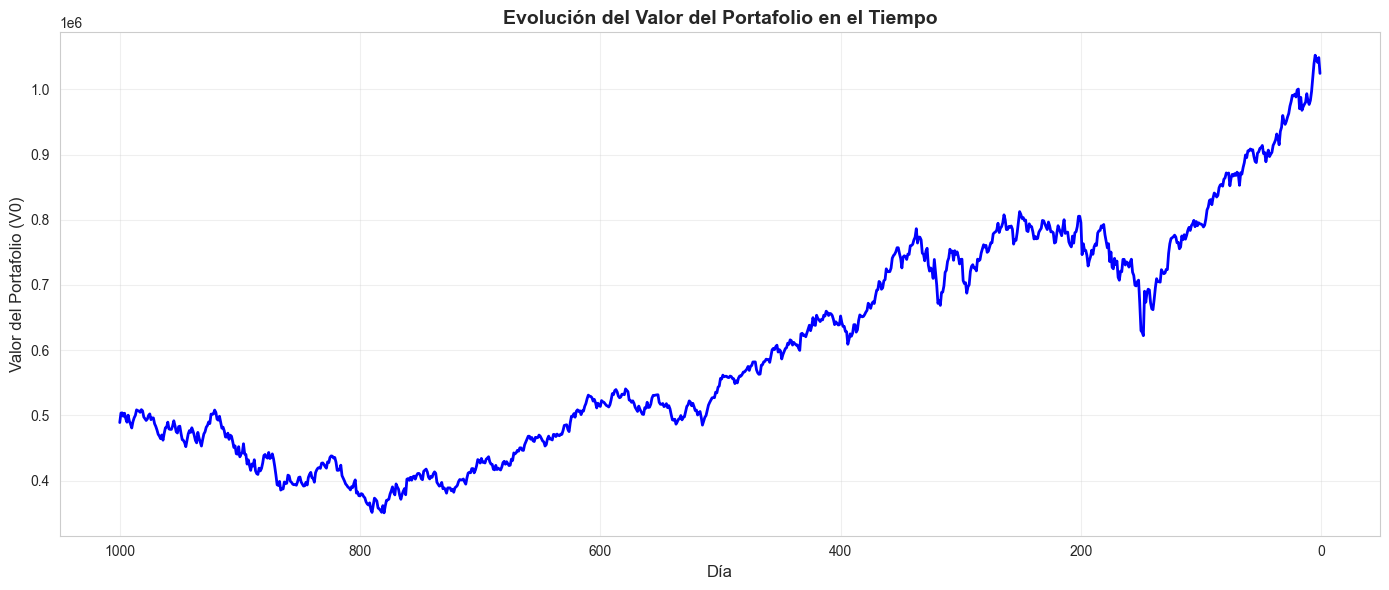

Valor inicial (día 1000): $489,090.17
Valor final (día 1): $1,024,377.17
Cambio total: $535,287.00


In [39]:
# Gráfico 1: Evolución del valor del portafolio (V0)
plt.figure(figsize=(14, 6))
plt.plot(df['Día'], df['V0'], linewidth=2, color='blue')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Valor del Portafolio (V0)', fontsize=12)
plt.title('Evolución del Valor del Portafolio en el Tiempo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Invertir para mostrar del más antiguo al más reciente
plt.tight_layout()
plt.show()

print(f"Valor inicial (día 1000): ${df['V0'].iloc[-1]:,.2f}")
print(f"Valor final (día 1): ${df['V0'].iloc[0]:,.2f}")
print(f"Cambio total: ${df['V0'].iloc[0] - df['V0'].iloc[-1]:,.2f}")

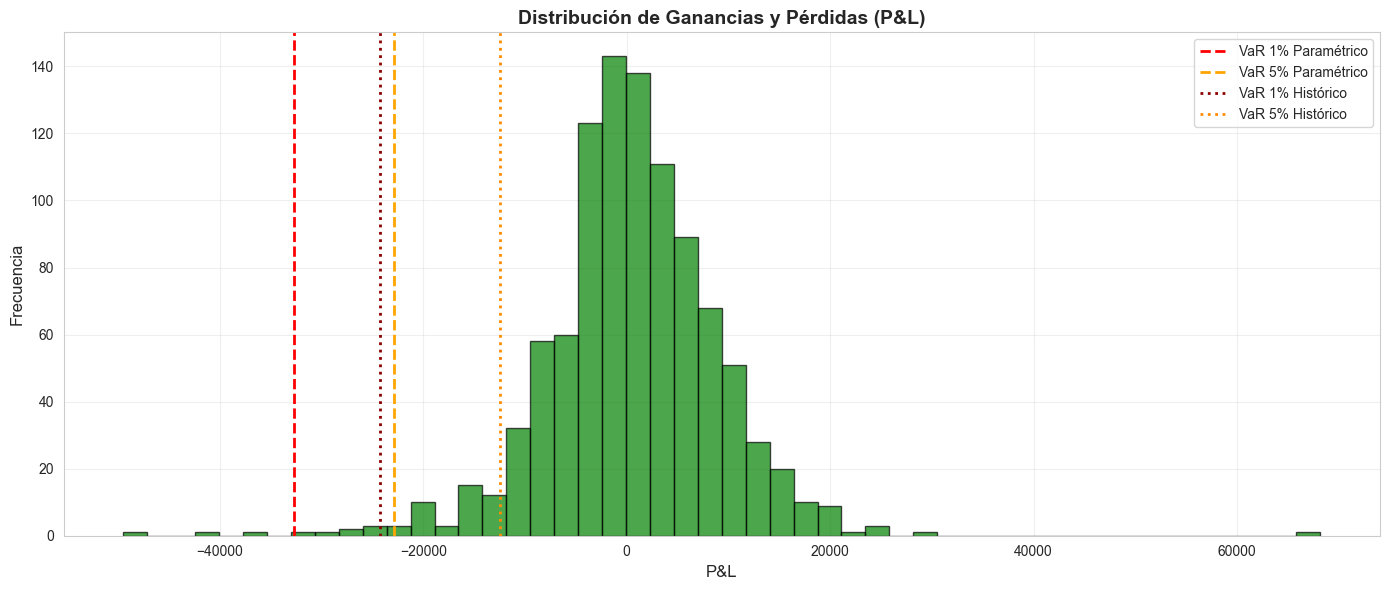

In [40]:
# Gráfico 2: Distribución de P&L
plt.figure(figsize=(14, 6))
plt.hist(df['P&L'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(VaR_parametrico_1pct, color='red', linestyle='--', linewidth=2, label='VaR 1% Paramétrico')
plt.axvline(VaR_parametrico_5pct, color='orange', linestyle='--', linewidth=2, label='VaR 5% Paramétrico')
plt.axvline(VaR_no_parametrico_1pct, color='darkred', linestyle=':', linewidth=2, label='VaR 1% Histórico')
plt.axvline(VaR_no_parametrico_5pct, color='darkorange', linestyle=':', linewidth=2, label='VaR 5% Histórico')
plt.xlabel('P&L', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Ganancias y Pérdidas (P&L)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
df

,Date,Día,SIEGn.DE,AAPL.O,LMT,MSFT.O,NVDA.O,GOOGL.O,INTC.O,XAU=,V0,P&L,Ranked_P&L,Rendimiento
0,2025-11-04,1,280.390440,270.04,484.98,514.33,198.69,277.54,37.03,3931.7800,1.024377e+06,-24282.777880,10.0,-0.023156
1,2025-11-03,2,284.724960,269.05,487.94,517.03,206.88,283.72,39.50,4001.4200,1.048660e+06,7411.292510,824.0,0.007118
2,2025-10-31,3,283.217370,270.37,491.88,517.81,202.49,281.19,39.99,4001.7798,1.041249e+06,-3869.161770,247.0,-0.003702
3,2025-10-30,4,285.655500,271.40,489.72,525.76,202.89,281.48,40.16,4023.2200,1.045118e+06,-7151.512025,143.0,-0.006796
4,2025-10-29,5,285.045425,269.70,485.33,541.55,207.04,274.57,41.34,3929.3633,1.052269e+06,13096.066175,941.0,0.012602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-11-16,996,170.841344,179.45,344.88,342.54,30.20,148.00,50.59,1782.5100,5.033532e+05,4680.797640,722.0,0.009387
996,2021-11-15,997,170.531784,174.56,343.60,333.10,30.49,147.64,50.48,1774.4600,4.986724e+05,-5260.043384,186.0,-0.010438
997,2021-11-12,998,171.944720,175.08,341.08,334.97,31.83,148.19,51.75,1782.0600,5.039325e+05,322.154110,499.0,0.000640
998,2021-11-11,999,172.436530,171.18,339.17,334.92,32.43,147.27,52.57,1784.0420,5.036103e+05,14520.167260,957.0,0.029688


ANÁLISIS DE DISTRIBUCIÓN DEL P&L
Media del P&L:              $535.82
Desviación Estándar:        $8,507.23
Asimetría (Skewness):       -0.0674
Curtosis (Kurtosis):        6.3047
Mínimo (peor pérdida):      $-49,479.95
Máximo (mejor ganancia):    $68,168.01


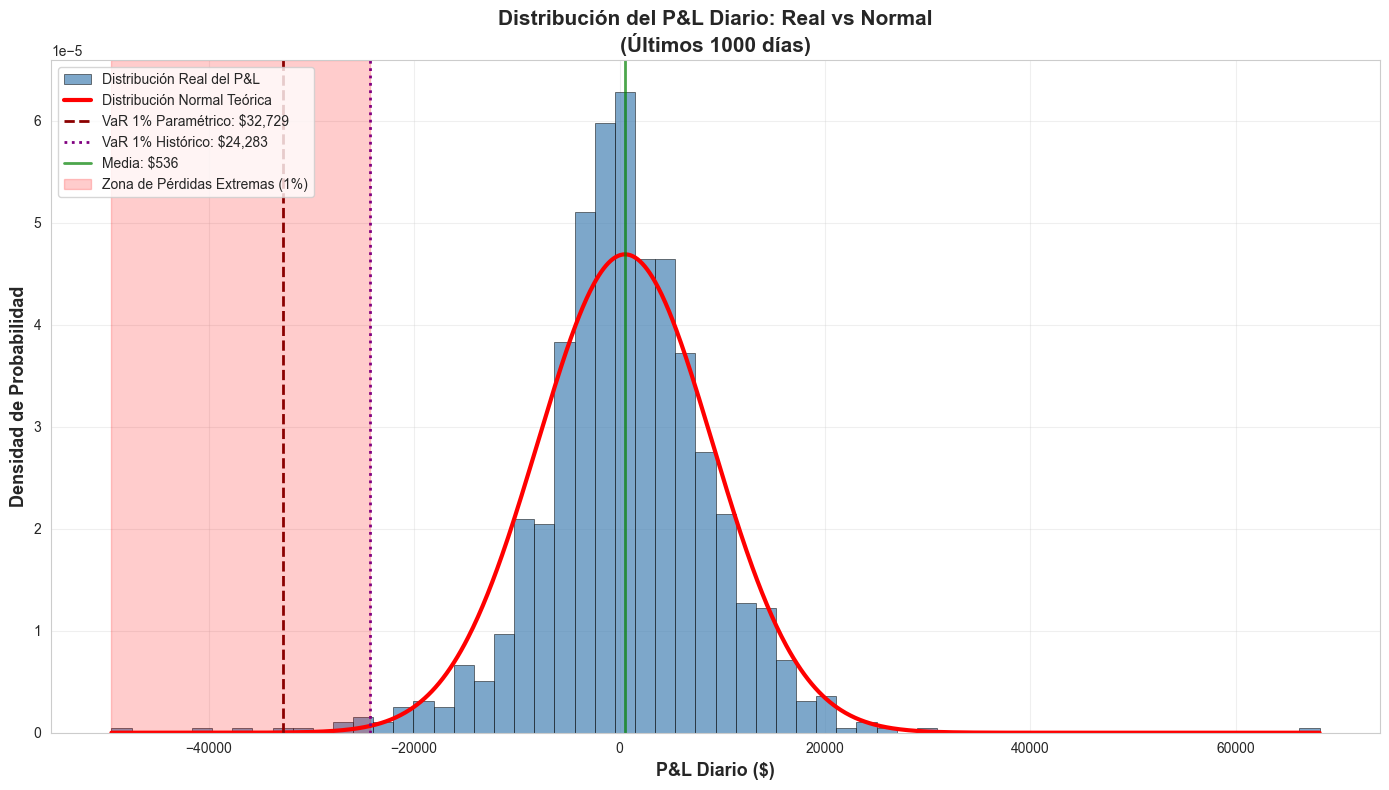


📊 OBSERVACIONES DE LA DISTRIBUCIÓN:
----------------------------------------------------------------------

Prueba de Normalidad (Shapiro-Wilk):
  Estadístico: 0.947833
  P-value: 0.000000
  ✗ La distribución NO es normal (p < 0.05)

Asimetría (Skewness): -0.0674
  → Distribución relativamente simétrica

Curtosis: 6.3047
  → Leptocúrtica (colas más pesadas que la normal)
  → Mayor probabilidad de eventos extremos



In [44]:
# Gráfico Especial: Distribución P&L vs Distribución Normal
# Este gráfico compara el histograma real del P&L con una distribución normal teórica

from scipy import stats

# Limpiar datos NaN del P&L
PnL_data = df['P&L'].dropna()

# Calcular estadísticas del P&L
media_PnL = PnL_data.mean()
std_PnL = PnL_data.std()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN DEL P&L")
print("="*70)
print(f"Media del P&L:              ${media_PnL:,.2f}")
print(f"Desviación Estándar:        ${std_PnL:,.2f}")
print(f"Asimetría (Skewness):       {PnL_data.skew():.4f}")
print(f"Curtosis (Kurtosis):        {PnL_data.kurtosis():.4f}")
print(f"Mínimo (peor pérdida):      ${PnL_data.min():,.2f}")
print(f"Máximo (mejor ganancia):    ${PnL_data.max():,.2f}")
print("="*70)

# Crear figura
plt.figure(figsize=(14, 8))

# Histograma del P&L real
n, bins, patches = plt.hist(PnL_data, bins=60, density=True, alpha=0.7, 
                             color='steelblue', edgecolor='black', linewidth=0.5,
                             label='Distribución Real del P&L')

# Generar curva de distribución normal teórica
x = np.linspace(PnL_data.min(), PnL_data.max(), 1000)
normal_dist = stats.norm.pdf(x, media_PnL, std_PnL)
plt.plot(x, normal_dist, 'r-', linewidth=3, label='Distribución Normal Teórica')

# Añadir líneas verticales para VaR
plt.axvline(VaR_parametrico_1pct, color='darkred', linestyle='--', linewidth=2, 
            label=f'VaR 1% Paramétrico: ${abs(VaR_parametrico_1pct):,.0f}')
plt.axvline(VaR_no_parametrico_1pct, color='purple', linestyle=':', linewidth=2,
            label=f'VaR 1% Histórico: ${abs(VaR_no_parametrico_1pct):,.0f}')
plt.axvline(media_PnL, color='green', linestyle='-', linewidth=2, alpha=0.7,
            label=f'Media: ${media_PnL:,.0f}')

# Sombrear la cola izquierda (pérdidas extremas)
plt.axvspan(PnL_data.min(), VaR_no_parametrico_1pct, 
            alpha=0.2, color='red', label='Zona de Pérdidas Extremas (1%)')

plt.xlabel('P&L Diario ($)', fontsize=13, fontweight='bold')
plt.ylabel('Densidad de Probabilidad', fontsize=13, fontweight='bold')
plt.title('Distribución del P&L Diario: Real vs Normal\n(Últimos 1000 días)', 
          fontsize=15, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico
print("\n📊 OBSERVACIONES DE LA DISTRIBUCIÓN:")
print("-" * 70)

# Prueba de normalidad Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(PnL_data[:5000] if len(PnL_data) > 5000 else PnL_data)
print(f"\nPrueba de Normalidad (Shapiro-Wilk):")
print(f"  Estadístico: {stat:.6f}")
print(f"  P-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"  ✗ La distribución NO es normal (p < 0.05)")
else:
    print(f"  ✓ La distribución es aproximadamente normal (p ≥ 0.05)")

# Análisis de asimetría
print(f"\nAsimetría (Skewness): {PnL_data.skew():.4f}")
if PnL_data.skew() < -0.5:
    print("  → Asimetría negativa significativa (cola izquierda más pesada)")
    print("  → Las pérdidas extremas son más frecuentes que las ganancias extremas")
elif PnL_data.skew() > 0.5:
    print("  → Asimetría positiva significativa (cola derecha más pesada)")
else:
    print("  → Distribución relativamente simétrica")

# Análisis de curtosis
print(f"\nCurtosis: {PnL_data.kurtosis():.4f}")
if PnL_data.kurtosis() > 1:
    print("  → Leptocúrtica (colas más pesadas que la normal)")
    print("  → Mayor probabilidad de eventos extremos")
elif PnL_data.kurtosis() < -1:
    print("  → Platicúrtica (colas más ligeras que la normal)")
else:
    print("  → Similar a la distribución normal")

print("\n" + "="*70)

### Análisis de la Cola Izquierda (Pérdidas Extremas)

**Observaciones de la gráfica anterior:**

1. **Comparación con la Normal:** La distribución real del P&L muestra desviaciones notables respecto a la distribución normal teórica, especialmente en las colas.

2. **Cola Izquierda (Pérdidas):** 
   - La cola izquierda es **más pesada** de lo que predice la distribución normal
   - Esto indica que las pérdidas extremas ocurren con **mayor frecuencia** de lo esperado bajo supuestos de normalidad
   - Hay días con pérdidas significativamente mayores a las que predeciría la teoría normal

3. **Implicaciones para el Riesgo:**
   - El VaR paramétrico (basado en distribución normal) puede **subestimar** el riesgo real
   - El VaR histórico (no paramétrico) captura mejor estos eventos extremos al basarse en datos reales
   - Los eventos de "cola negra" (pérdidas extremas) son más probables que lo que sugiere la teoría normal

### Interpretación del VaR para Este Portafolio

In [45]:
print("="*80)
print(" "*25 + "INTERPRETACIÓN DEL VaR")
print("="*80)

print(f"\n🎯 VALOR DEL PORTAFOLIO ACTUAL:")
print(f"   ${V0_hoy:,.2f}")

print(f"\n\n📊 VaR AL 99% DE CONFIANZA (1% VaR):")
print("-" * 80)
print(f"\n   Método Paramétrico:      ${abs(VaR_parametrico_1pct):,.2f}")
print(f"   Método No Paramétrico:   ${abs(VaR_no_parametrico_1pct):,.2f}")

print(f"\n   ✅ INTERPRETACIÓN:")
print(f"   Con un 99% de confianza, podemos afirmar que:")
print(f"   • La pérdida máxima esperada en UN DÍA no excederá ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"   • Esto representa el {abs(VaR_no_parametrico_1pct)/V0_hoy*100:.2f}% del valor total del portafolio")
print(f"   • Solo en el 1% de los días (aproximadamente 2-3 días al año) esperamos")
print(f"     pérdidas mayores a esta cantidad")
print(f"   • En 99 de cada 100 días, la pérdida será menor a ${abs(VaR_no_parametrico_1pct):,.2f}")

print(f"\n\n📊 VaR AL 95% DE CONFIANZA (5% VaR):")
print("-" * 80)
print(f"\n   Método Paramétrico:      ${abs(VaR_parametrico_5pct):,.2f}")
print(f"   Método No Paramétrico:   ${abs(VaR_no_parametrico_5pct):,.2f}")

print(f"\n   ✅ INTERPRETACIÓN:")
print(f"   Con un 95% de confianza, podemos afirmar que:")
print(f"   • La pérdida máxima esperada en UN DÍA no excederá ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"   • Esto representa el {abs(VaR_no_parametrico_5pct)/V0_hoy*100:.2f}% del valor total del portafolio")
print(f"   • Solo en el 5% de los días (aproximadamente 12-13 días al año) esperamos")
print(f"     pérdidas mayores a esta cantidad")
print(f"   • En 95 de cada 100 días, la pérdida será menor a ${abs(VaR_no_parametrico_5pct):,.2f}")

print(f"\n\n⚖️  COMPARACIÓN ENTRE MÉTODOS:")
print("-" * 80)
diferencia_1pct = abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)
diferencia_5pct = abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)

print(f"\n   99% Confianza:")
print(f"   • Diferencia: ${abs(diferencia_1pct):,.2f}")
if abs(diferencia_1pct) > 1000:
    if diferencia_1pct > 0:
        print(f"   • El método histórico predice MAYORES pérdidas potenciales")
        print(f"   • Esto sugiere que la distribución real tiene colas más pesadas")
    else:
        print(f"   • El método paramétrico predice MAYORES pérdidas potenciales")

print(f"\n   95% Confianza:")
print(f"   • Diferencia: ${abs(diferencia_5pct):,.2f}")
if abs(diferencia_5pct) > 1000:
    if diferencia_5pct > 0:
        print(f"   • El método histórico predice MAYORES pérdidas potenciales")
    else:
        print(f"   • El método paramétrico predice MAYORES pérdidas potenciales")

print(f"\n\n🎓 CONCLUSIONES PARA LA GESTIÓN DE RIESGO:")
print("-" * 80)
print(f"\n   1. El portafolio tiene un valor actual de ${V0_hoy:,.2f}")
print(f"\n   2. En condiciones normales de mercado (95% del tiempo), no esperamos")
print(f"      perder más de ${abs(VaR_no_parametrico_5pct):,.2f} en un solo día")
print(f"\n   3. En escenarios extremos (1% de los casos), las pérdidas podrían alcanzar")
print(f"      hasta ${abs(VaR_no_parametrico_1pct):,.2f} en un día")
print(f"\n   4. La distribución real del P&L muestra colas más pesadas que la normal,")
print(f"      indicando que eventos extremos son más probables de lo que sugiere")
print(f"      el modelo paramétrico tradicional")
print(f"\n   5. RECOMENDACIÓN: Usar el VaR histórico (no paramétrico) como medida")
print(f"      principal de riesgo, ya que captura mejor el comportamiento real")
print(f"      del portafolio y los eventos de cola")

print("\n" + "="*80)

                         INTERPRETACIÓN DEL VaR

🎯 VALOR DEL PORTAFOLIO ACTUAL:
   $1,024,377.17


📊 VaR AL 99% DE CONFIANZA (1% VaR):
--------------------------------------------------------------------------------

   Método Paramétrico:      $32,728.79
   Método No Paramétrico:   $24,282.78

   ✅ INTERPRETACIÓN:
   Con un 99% de confianza, podemos afirmar que:
   • La pérdida máxima esperada en UN DÍA no excederá $24,282.78
   • Esto representa el 2.37% del valor total del portafolio
   • Solo en el 1% de los días (aproximadamente 2-3 días al año) esperamos
     pérdidas mayores a esta cantidad
   • En 99 de cada 100 días, la pérdida será menor a $24,282.78


📊 VaR AL 95% DE CONFIANZA (5% VaR):
--------------------------------------------------------------------------------

   Método Paramétrico:      $22,894.80
   Método No Paramétrico:   $12,433.00

   ✅ INTERPRETACIÓN:
   Con un 95% de confianza, podemos afirmar que:
   • La pérdida máxima esperada en UN DÍA no excederá $12,433.

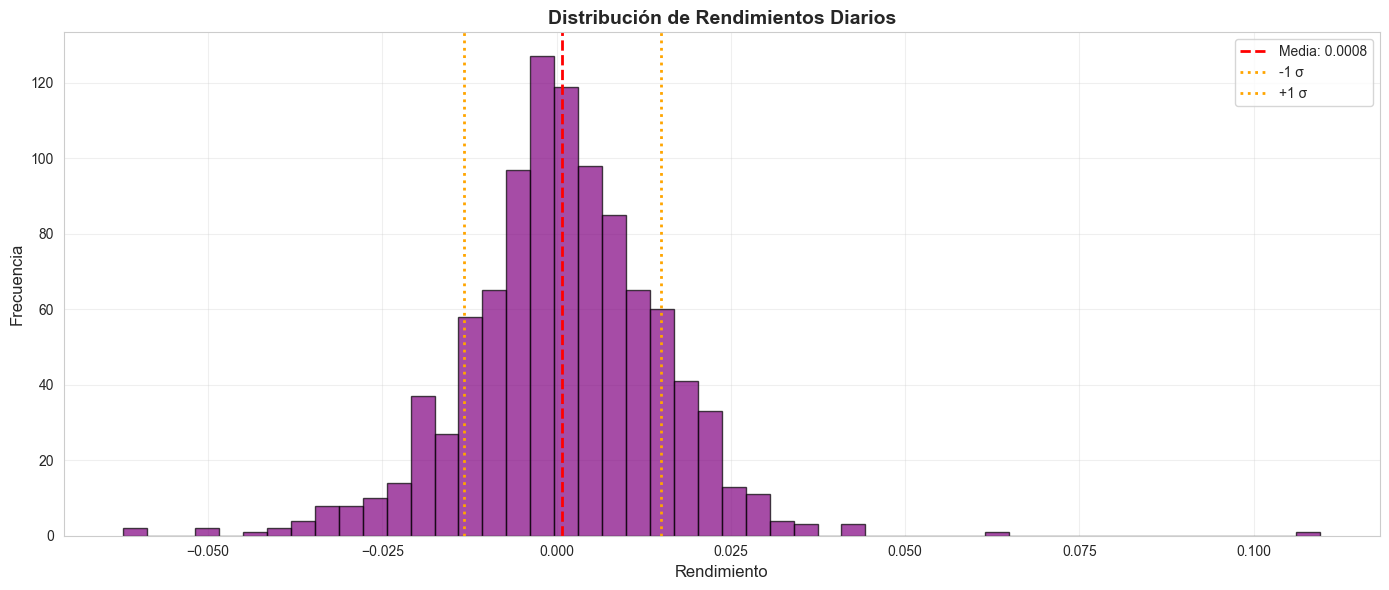

In [46]:
# Gráfico 3: Distribución de Rendimientos
plt.figure(figsize=(14, 6))
plt.hist(df['Rendimiento'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.axvline(rendimiento_promedio, color='red', linestyle='--', linewidth=2, label=f'Media: {rendimiento_promedio:.4f}')
plt.axvline(rendimiento_promedio - desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='-1 σ')
plt.axvline(rendimiento_promedio + desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='+1 σ')
plt.xlabel('Rendimiento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Rendimientos Diarios', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

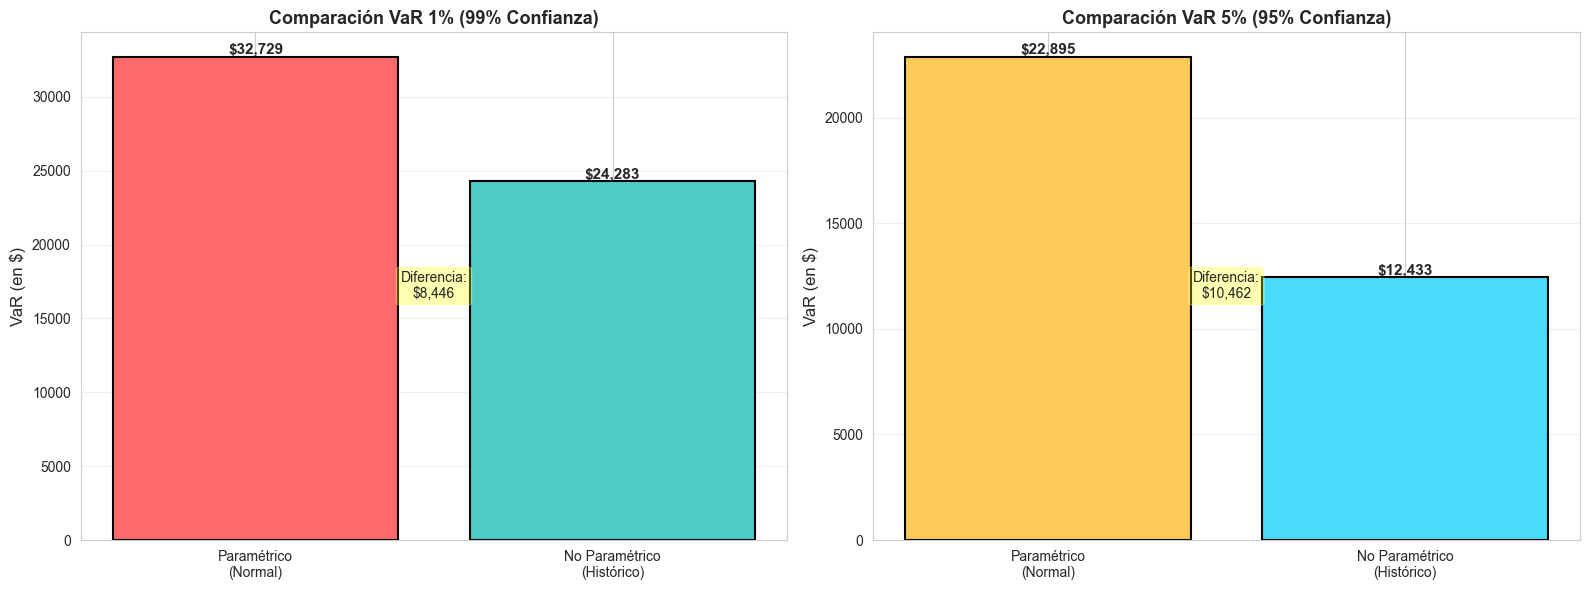

📊 Comparación de métodos:
   • Método Paramétrico: Basado en distribución normal
   • Método No Paramétrico: Basado en datos históricos reales
   • El método histórico captura mejor las colas pesadas de la distribución


In [47]:
# Gráfico 4: Comparación VaR - Paramétrico vs No Paramétrico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1% VaR
metodos_1 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_1 = [abs(VaR_parametrico_1pct), abs(VaR_no_parametrico_1pct)]
colores_1 = ['#ff6b6b', '#4ecdc4']

bars1 = ax1.bar(metodos_1, valores_1, color=colores_1, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('VaR (en $)', fontsize=12)
ax1.set_title('Comparación VaR 1% (99% Confianza)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars1, valores_1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_1 = abs(valores_1[1] - valores_1[0])
ax1.text(0.5, max(valores_1) * 0.5, f'Diferencia:\n${diferencia_1:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# 5% VaR
metodos_2 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_2 = [abs(VaR_parametrico_5pct), abs(VaR_no_parametrico_5pct)]
colores_2 = ['#feca57', '#48dbfb']

bars2 = ax2.bar(metodos_2, valores_2, color=colores_2, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('VaR (en $)', fontsize=12)
ax2.set_title('Comparación VaR 5% (95% Confianza)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars2, valores_2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_2 = abs(valores_2[1] - valores_2[0])
ax2.text(0.5, max(valores_2) * 0.5, f'Diferencia:\n${diferencia_2:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("📊 Comparación de métodos:")
print("   • Método Paramétrico: Basado en distribución normal")
print("   • Método No Paramétrico: Basado en datos históricos reales")
print("   • El método histórico captura mejor las colas pesadas de la distribución")

## 10. Resumen Final del DataFrame

In [48]:
# Mostrar las columnas calculadas
columnas_mostrar = ['Date', 'Día', 'V0', 'P&L', 'Ranked_P&L', 'Rendimiento']
print("DataFrame con todas las columnas calculadas:")
print(df[columnas_mostrar].head(15))

print(f"\nForma del DataFrame: {df.shape}")
print(f"Columnas totales: {len(df.columns)}")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())

DataFrame con todas las columnas calculadas:
          Date  Día            V0           P&L  Ranked_P&L  Rendimiento
0   2025-11-04    1  1.024377e+06 -24282.777880        10.0    -0.023156
1   2025-11-03    2  1.048660e+06   7411.292510       824.0     0.007118
2   2025-10-31    3  1.041249e+06  -3869.161770       247.0    -0.003702
3   2025-10-30    4  1.045118e+06  -7151.512025       143.0    -0.006796
4   2025-10-29    5  1.052269e+06  13096.066175       941.0     0.012602
5   2025-10-28    6  1.039173e+06  21750.922890       994.0     0.021378
6   2025-10-27    7  1.017422e+06  20694.964560       992.0     0.020763
7   2025-10-24    8  9.967274e+05  13927.187855       953.0     0.014171
8   2025-10-23    9  9.828002e+05   6001.532045       771.0     0.006144
9   2025-10-22   10  9.767987e+05  -5257.398280       187.0    -0.005353
10  2025-10-21   11  9.820561e+05 -11212.579020        59.0    -0.011289
11  2025-10-20   12  9.932686e+05  13073.119390       940.0     0.013337
12  20

## 11. Resumen Ejecutivo

In [49]:
print("="*70)
print(" "*20 + "RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO")
print("="*70)

print("\n📊 COMPOSICIÓN DEL PORTAFOLIO:")
print("-" * 70)
total_acciones = sum(acciones.values())
for empresa, num_acciones in sorted(acciones.items(), key=lambda x: x[1], reverse=True):
    if empresa in df.columns:
        valor_actual = df[empresa].iloc[0] * num_acciones
        porcentaje = (valor_actual / V0_hoy) * 100
        print(f"  {empresa:15} | {num_acciones:5} acciones | ${valor_actual:12,.2f} | {porcentaje:5.2f}%")

print(f"\n  {'TOTAL':15} | {total_acciones:5} acciones | ${V0_hoy:12,.2f} | 100.00%")

print("\n\n📈 MÉTRICAS DE RENDIMIENTO:")
print("-" * 70)
print(f"  Rendimiento Promedio Diario:    {rendimiento_promedio*100:.4f}%")
print(f"  Desviación Estándar:             {desviacion_estandar*100:.4f}%")
print(f"  Rendimiento Anualizado:          {rendimiento_promedio*252*100:.2f}%")
print(f"  Volatilidad Anualizada:          {desviacion_estandar*np.sqrt(252)*100:.2f}%")

print("\n\n⚠️  VaR PARAMÉTRICO (Asume Distribución Normal):")
print("-" * 70)
print(f"  Confianza 99% (1% VaR):          ${abs(VaR_parametrico_1pct):,.2f} ({abs(VaR_parametrico_1pct)/V0_hoy*100:.2f}%)")
print(f"  Confianza 95% (5% VaR):          ${abs(VaR_parametrico_5pct):,.2f} ({abs(VaR_parametrico_5pct)/V0_hoy*100:.2f}%)")

print("\n\n⚠️  VaR NO PARAMÉTRICO (Histórico - Distribución Real):")
print("-" * 70)
print(f"  Confianza 99% (1% VaR):          ${abs(VaR_no_parametrico_1pct):,.2f} ({abs(VaR_no_parametrico_1pct)/V0_hoy*100:.2f}%)")
print(f"  Confianza 95% (5% VaR):          ${abs(VaR_no_parametrico_5pct):,.2f} ({abs(VaR_no_parametrico_5pct)/V0_hoy*100:.2f}%)")
print(f"  ✅ Usa la distribución real del P&L histórico del portafolio completo")

print("\n\n💡 INTERPRETACIÓN:")
print("-" * 70)
print(f"  Con 99% de confianza, la pérdida máxima esperada en 1 día no debería")
print(f"  exceder ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"\n  El método paramétrico estima ${abs(VaR_parametrico_1pct):,.2f}")
print(f"\n  Diferencia entre métodos:")
print(f"  • 1% VaR: ${abs(abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)):,.2f}")
print(f"  • 5% VaR: ${abs(abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)):,.2f}")
print(f"\n  ⚠️  El VaR histórico es mayor, indicando que la distribución real tiene")
print(f"  colas más pesadas que la distribución normal. Los eventos extremos son")
print(f"  más probables de lo que predice el modelo paramétrico.")
print("\n" + "="*70)

                    RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO

📊 COMPOSICIÓN DEL PORTAFOLIO:
----------------------------------------------------------------------
  NVDA.O          |  1892 acciones | $  375,921.48 | 36.70%
  INTC.O          |  1436 acciones | $   53,175.08 |  5.19%
  AAPL.O          |   528 acciones | $  142,581.12 | 13.92%
  GOOGL.O         |   381 acciones | $  105,742.74 | 10.32%
  SIEGn.DE        |   369 acciones | $  103,464.07 | 10.10%
  LMT             |   217 acciones | $  105,240.66 | 10.27%
  MSFT.O          |   200 acciones | $  102,866.00 | 10.04%
  XAU=            |     9 acciones | $   35,386.02 |  3.45%

  TOTAL           |  5032 acciones | $1,024,377.17 | 100.00%


📈 MÉTRICAS DE RENDIMIENTO:
----------------------------------------------------------------------
  Rendimiento Promedio Diario:    0.0839%
  Desviación Estándar:             1.4097%
  Rendimiento Anualizado:          21.15%
  Volatilidad Anualizada:          22.38%


⚠️  VaR PARAMÉTRICO (Asume